In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def simulate_det_SIRD_model(beta, gamma, mu, N, I0, R0, num_days):
    S, I, R, D = np.zeros(num_days), np.zeros(num_days), np.zeros(num_days), np.zeros(num_days)
    S[0] = N - I0 - R0
    I[0] = I0
    R[0] = R0
    D[0] = 0

    for t in range(1, num_days):
        new_infections = beta * S[t-1] * I[t-1] / N
        new_recoveries = gamma * I[t-1]
        new_death = mu * I[t-1]
        
        S[t] = S[t-1] - new_infections
        I[t] = I[t-1] + new_infections - new_recoveries - new_death
        R[t] = R[t-1] + new_recoveries
        D[t] = D[t-1] + new_death
    
    return S, I, R, D


def simulate_stoc_SIRD_model(beta, gamma, mu, N, I0, R0, num_days):
    S, I, R, D = np.zeros(num_days), np.zeros(num_days), np.zeros(num_days), np.zeros(num_days)
    S[0] = N - I0 - R0
    I[0] = I0
    R[0] = R0
    D[0] = 0

    for t in range(1,num_days):
        if I[t-1] < 0:
            I[t-1] = 0
        elif R[t-1] < 0:
            R[t-1] = 0
        elif S[t-1] < 0:
            S[t-1] = 0
                
        new_infections = np.random.binomial(S[t-1], beta * I[t-1] / N)
        new_recoveries = np.random.binomial(I[t-1], gamma)
        new_death = np.random.binomial(I[t-1], mu)

        S[t] = S[t-1] - new_infections
        I[t] = I[t-1] + new_infections - new_recoveries - new_death
        R[t] = R[t-1] + new_recoveries
        D[t] = D[t-1] + new_death
        
    return S, I, R, D

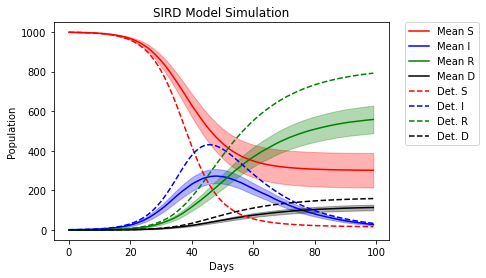

In [5]:
# Define the parameters
beta = 0.25
gamma = 1/20
mu = 1/100
N = 1000
I0, R0 = 1, 0
num_days = 100

# Simulate SIRS deterministic model
S_det, I_det, R_det, D_det = simulate_det_SIRD_model(beta, gamma, mu, N, I0, R0, num_days)

# makes 100 plots
num_simulations = 100

# Arrays to store simulation results
all_S = np.zeros((num_simulations, num_days))
all_I = np.zeros((num_simulations, num_days))
all_R = np.zeros((num_simulations, num_days))
all_D = np.zeros((num_simulations, num_days))

# Run simulations
for i in range(num_simulations):
    # Simulate SIR model
    S, I, R, D = simulate_stoc_SIRD_model(beta, gamma, mu, N, I0, R0, num_days)
    # Store results
    all_S[i] = S
    all_I[i] = I
    all_R[i] = R
    all_D[i] = D

# Calculate mean and confidence interval
mean_S = np.mean(all_S, axis=0)
mean_I = np.mean(all_I, axis=0)
mean_R = np.mean(all_R, axis=0)
mean_D = np.mean(all_D, axis=0)

std_S = np.std(all_S, axis=0)
std_I = np.std(all_I, axis=0)
std_R = np.std(all_R, axis=0)
std_D = np.std(all_D, axis=0)

lower_ci_S = mean_S - 1.96 * std_S / np.sqrt(num_simulations)
lower_ci_I = mean_I - 1.96 * std_I / np.sqrt(num_simulations)
lower_ci_R = mean_R - 1.96 * std_R / np.sqrt(num_simulations)
lower_ci_D = mean_D - 1.96 * std_D / np.sqrt(num_simulations)

upper_ci_S = mean_S + 1.96 * std_S / np.sqrt(num_simulations)
upper_ci_I = mean_I + 1.96 * std_I / np.sqrt(num_simulations)
upper_ci_R = mean_R + 1.96 * std_R / np.sqrt(num_simulations)
upper_ci_D = mean_D + 1.96 * std_D / np.sqrt(num_simulations)

#the mean and confidence interval
plt.plot(mean_S, label='Mean S', color='r')
plt.plot(mean_I, label='Mean I', color='b')
plt.plot(mean_R, label='Mean R', color='g')
plt.plot(mean_D, label='Mean D', color='k')

plt.fill_between(range(num_days), lower_ci_S, upper_ci_S, color='r', alpha=0.3)
plt.fill_between(range(num_days), lower_ci_I, upper_ci_I, color='b', alpha=0.3)
plt.fill_between(range(num_days), lower_ci_R, upper_ci_R, color='g', alpha=0.3)
plt.fill_between(range(num_days), lower_ci_D, upper_ci_D, color='k', alpha=0.3)

plt.plot(S_det, label='Det. S', color='r', linestyle='--')
plt.plot(I_det, label='Det. I', color='b', linestyle='--')
plt.plot(R_det, label='Det. R', color='g', linestyle='--')
plt.plot(D_det, label='Det. D', color='k', linestyle='--')

plt.xlabel('Days')
plt.ylabel('Population')
plt.title('SIRD Model Simulation')
#legend beside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()